<a href="https://colab.research.google.com/github/Al-Tayeb96/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

## Project Overview

#Imports

In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect Data

In [ ]:

path="/content/drive/MyDrive/ CodingDojo/01-Fundamentals/Week02/Data folder/sales_predictions_2023.csv"
df_sales=pd.read_csv(path)



In [ ]:
df2_sales=df_sales.copy()

In [ ]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_sales.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## How many rows and columns?

In [ ]:
df_sales.shape

(8523, 12)

There are 8523 rows and 12 columns

##What are the datatypes of each variable?

In [ ]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

All  data types are as they should be.



## Clean Data

##Are there duplicates? If so, drop any duplicates.

In [ ]:
duplicates_rows_all=df_sales.duplicated().sum()
duplicates_rows_all

0

##This datafram don't have any duplicates.

##Identify missing values.

In [ ]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
round(df_sales.isna().sum()/len(df_sales)*100,2)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

Missing Values:

There are 1463 missing values in the Item_Weight  column. (17.17%)


There are 2410 missing values in the Outlet_Size in usd column. (28.28%)

##Address the missing values by using a placeholder value.

In [ ]:
df_sales['Item_Weight'].dtypes

dtype('float64')

In [ ]:
medn_value=df_sales['Item_Weight'].median()

In [ ]:
df_sales['Item_Weight']=df_sales['Item_Weight'].fillna(medn_value)


check the data type of Item_Weight
and deal with the missing values, we could fill them in with the  -1 for this feature.

In [ ]:
df_sales['Outlet_Size'].dtypes

dtype('O')

In [ ]:
df_sales['Outlet_Size']=df_sales['Outlet_Size'].fillna("MISSING")

check the data type of Outlet_Size
and deal with the missing values, we could fill them in with the word MISSING for this feature.

##Confirm that there are no missing values after addressing them.

In [ ]:
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

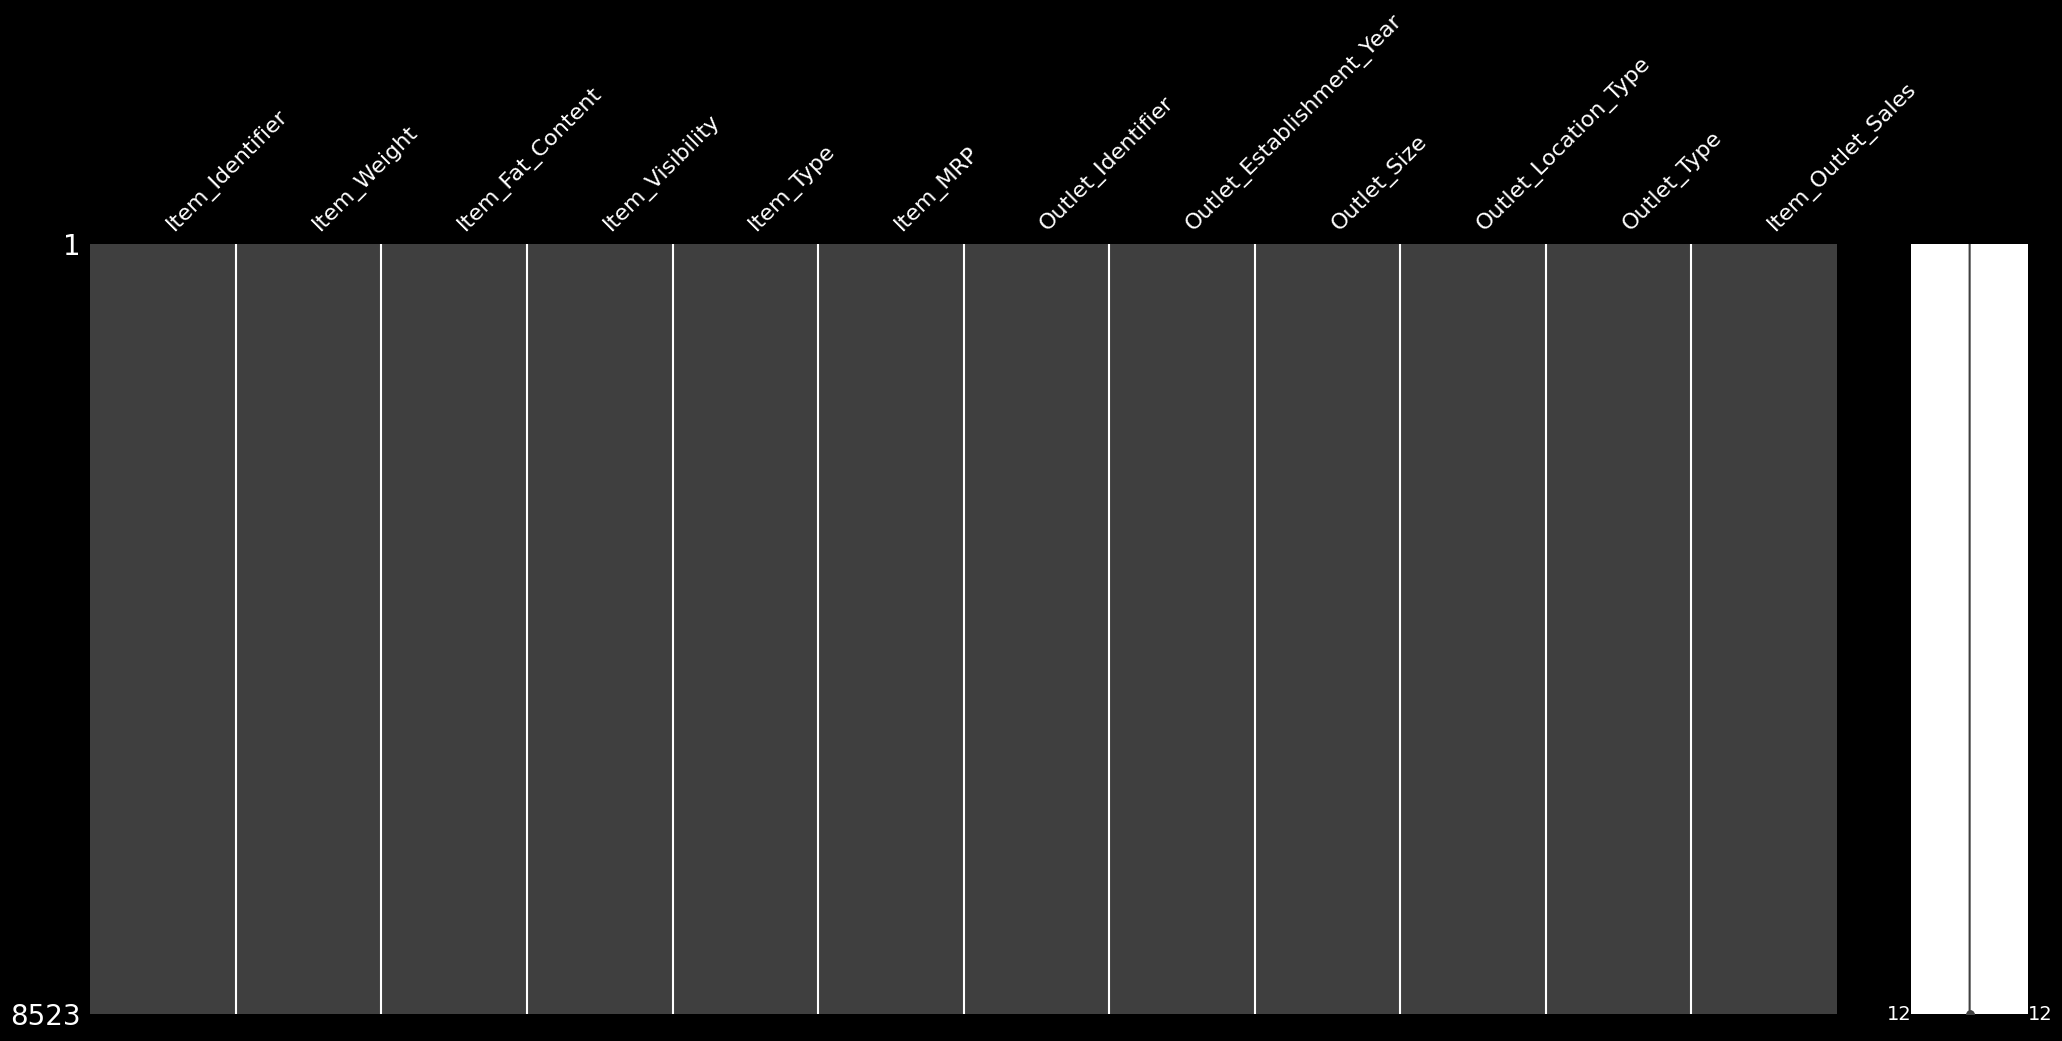

In [ ]:
msno.matrix(df_sales)

## Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [ ]:
for cols in df_sales:
  print(f"value of {cols} contins ")
  print(df_sales[cols].value_counts())
  print("\n\n")

value of Item_Identifier contins 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



value of Item_Weight contins 
12.600    1516
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 415, dtype: int64



value of Item_Fat_Content contins 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



value of Item_Visibility contins 
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64



value of Item_Type contins 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Fr

In [ ]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

After further investigation of the categorical columns, there are inconsistencies with spellings of the following categories in the Item_Fat_Content column:

LF and low fat should be Low Fat


reg should be Regular


In [ ]:
dict_fat={"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"}

In [ ]:
for cols in dict_fat:
  df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace(dict_fat)

In [ ]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [ ]:
numric_df=df_sales.describe().round(2)
numric_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.81,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [ ]:
req_num=["min","max","mean"]
numric_df.loc[req_num]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.56,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96
mean,12.81,0.07,140.99,1997.83,2181.29


## Exploratory Data Analysis

In [ ]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background'])

#Histograms to view the distributions of numerical features in your dataset.

In [ ]:
num_cols=df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

[Text(0.5, 1.0, 'the distributions of numerical features')]

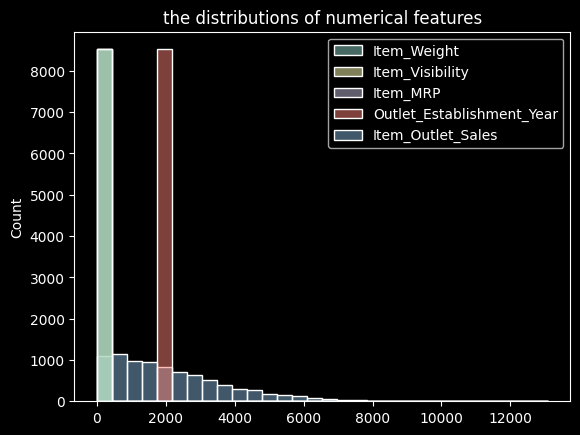

In [ ]:
ax=sns.histplot(df_sales,bins=30)
ax.set(title='the distributions of numerical features')


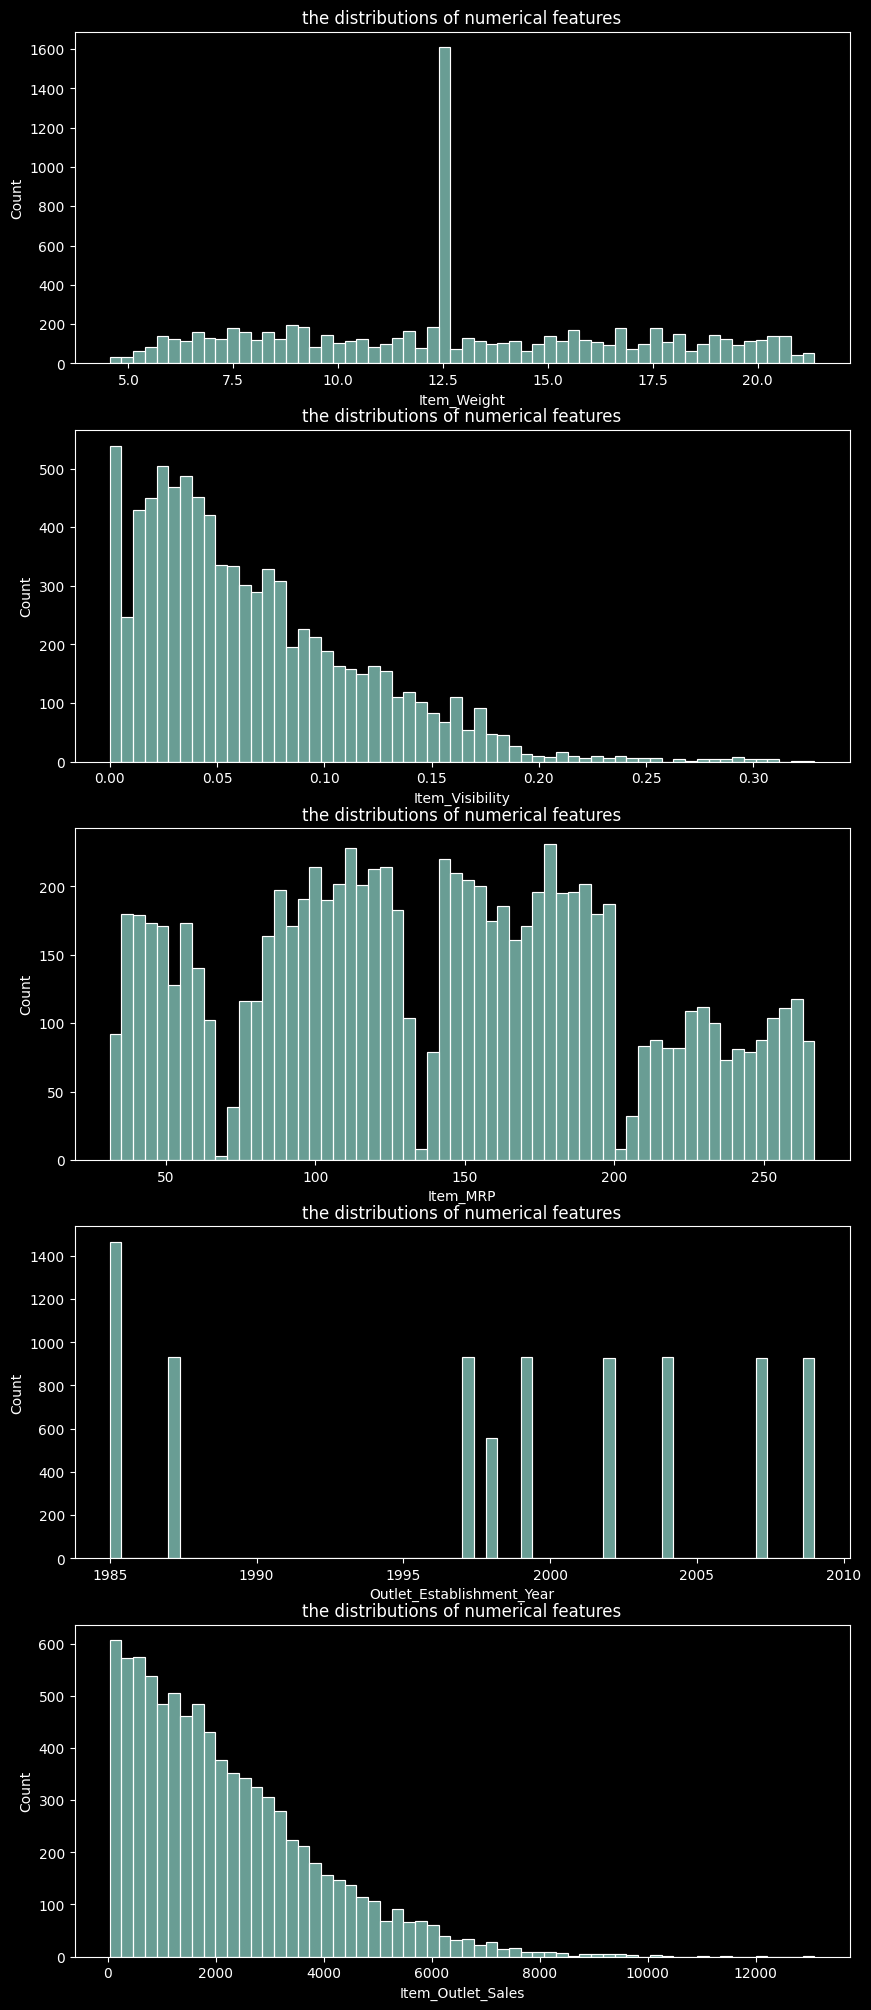

In [ ]:
i=0
fig,axes=plt.subplots(len(num_cols),figsize=(10,25))
for cols in num_cols:
   ax=sns.histplot(df_sales,x=cols,bins=60,ax=axes[i])

   ax.set(xlabel=f"{cols}",title="the distributions of numerical features")
   i=i+1


#Boxplots to view statistical summaries of numerical features in your dataset.

[Text(0.5, 1.0, 'statistical summaries of numerical features')]

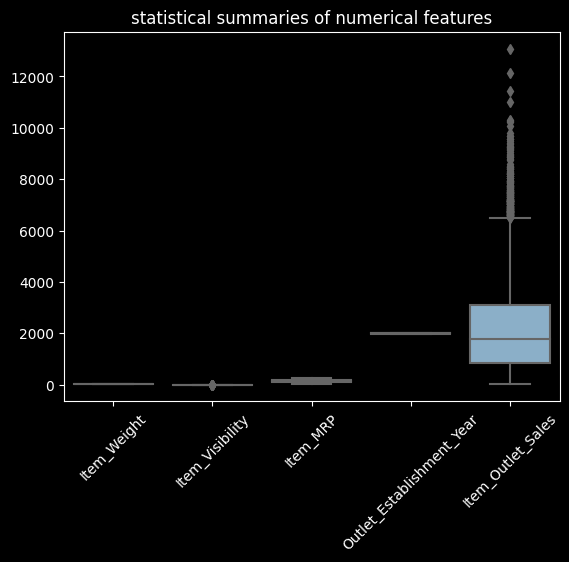

In [ ]:
fig,ax=plt.subplots()
ax=sns.boxplot(df_sales)
ax.tick_params(axis='x',rotation=45)
ax.set(title='statistical summaries of numerical features')


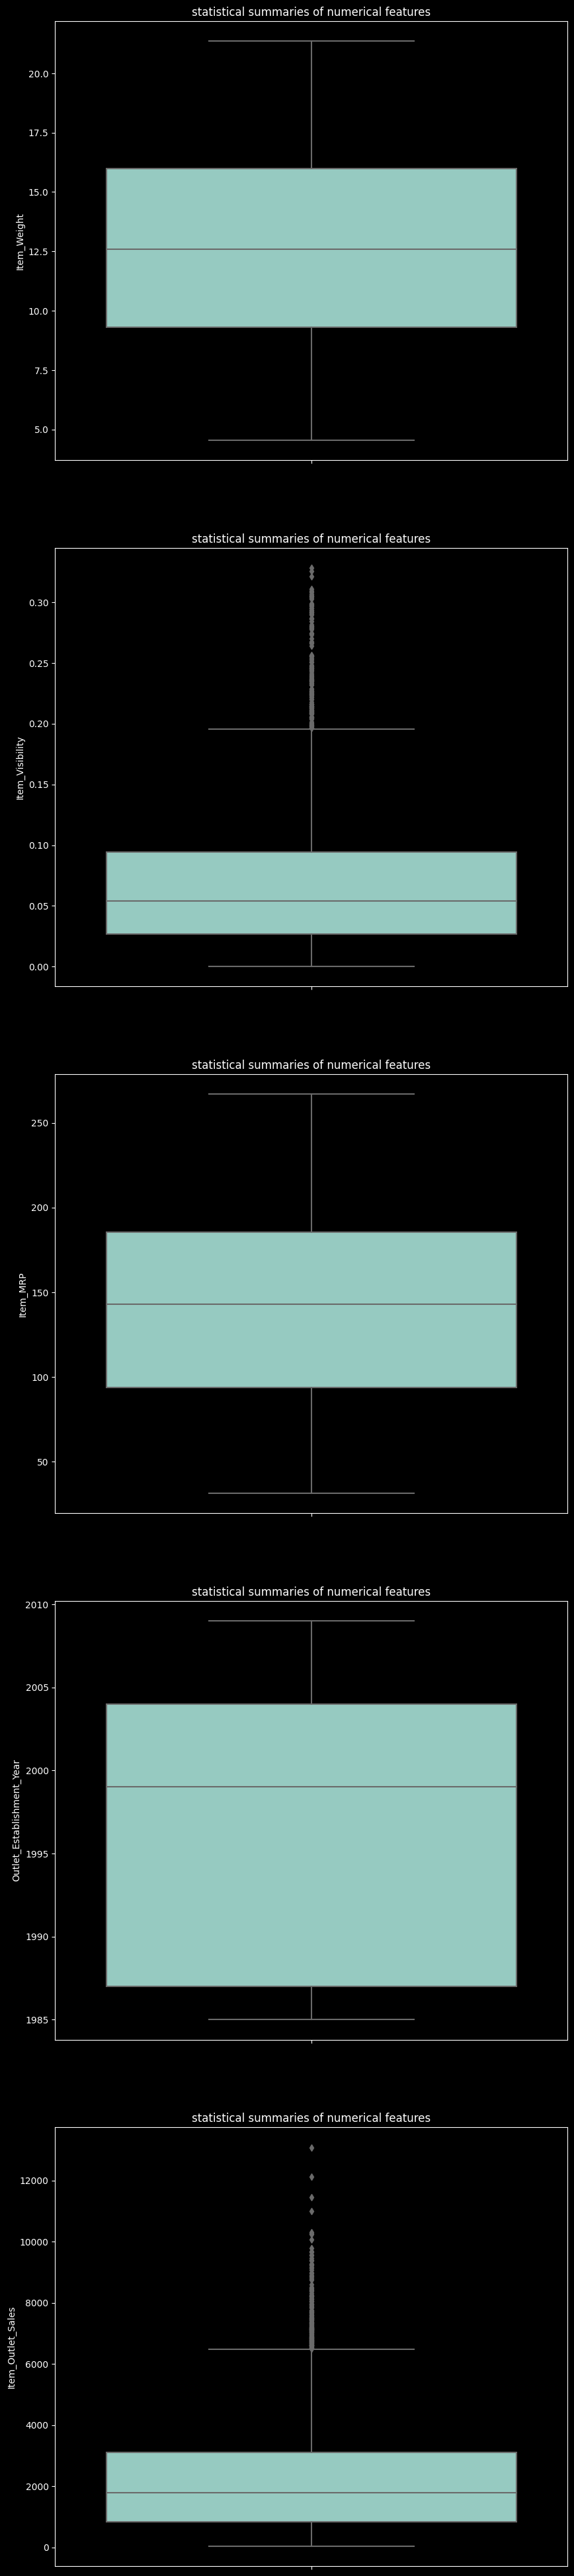

In [ ]:
i=0
fig,axes=plt.subplots(len(num_cols),figsize=(10,50))
for cols in num_cols:
   ax=sns.boxplot(df_sales,y=cols,ax=axes[i])

   ax.set(title="statistical summaries of numerical features")
   i=i+1

In [ ]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df_sales['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

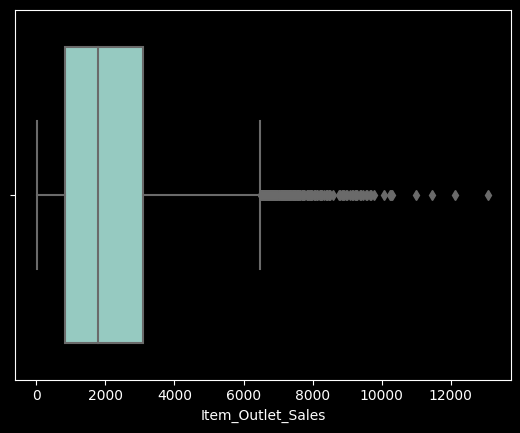

In [ ]:
ax=sns.boxplot(df_sales,x="Item_Outlet_Sales")

#Countplots to view the frequency of each class of categorial features in your dataset.

In [ ]:
cat_cols=df_sales.select_dtypes("object").columns
cat_cols2=cat_cols[1:len(cat_cols)]
cat_cols2

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

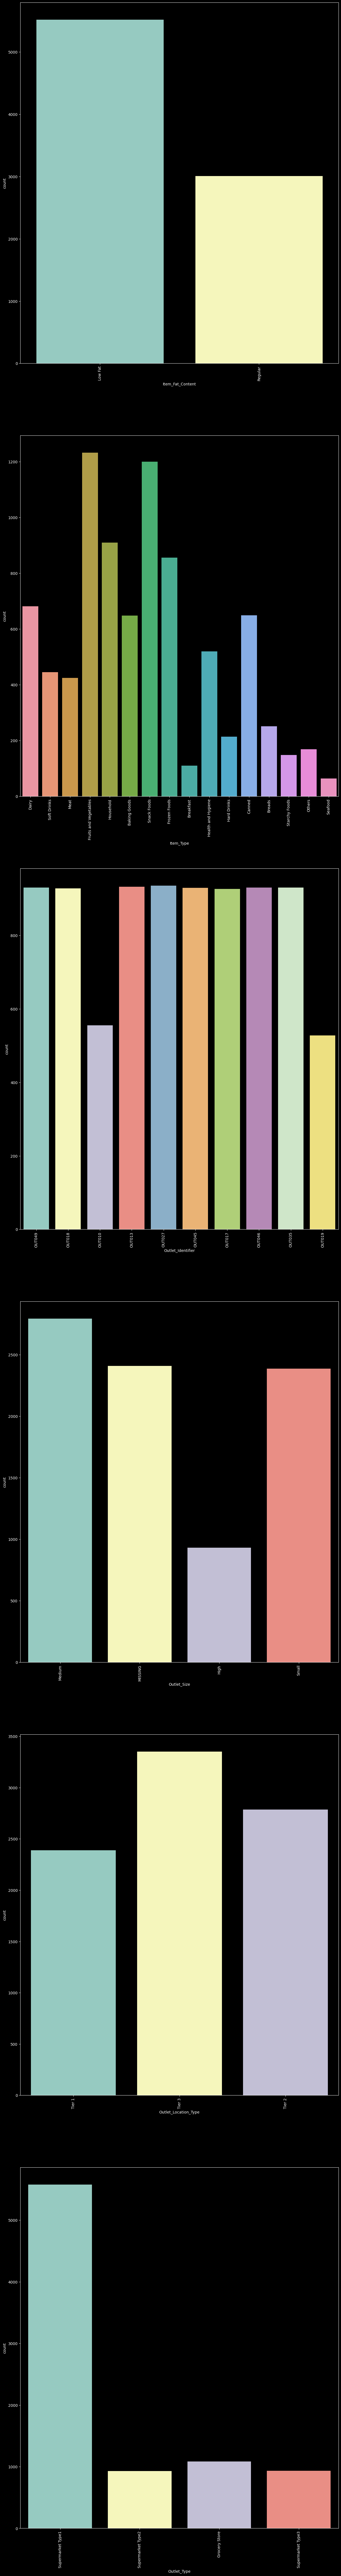

In [ ]:
i=0
fig,axes=plt.subplots(len(cat_cols2),figsize=(15,120))
for cols in cat_cols2:
   ax=sns.countplot(df_sales,x=cols,ax=axes[i])

   ax.tick_params(axis='x',rotation=90)
   ax.set(xlabel=f"{cols}")
   i=i+1


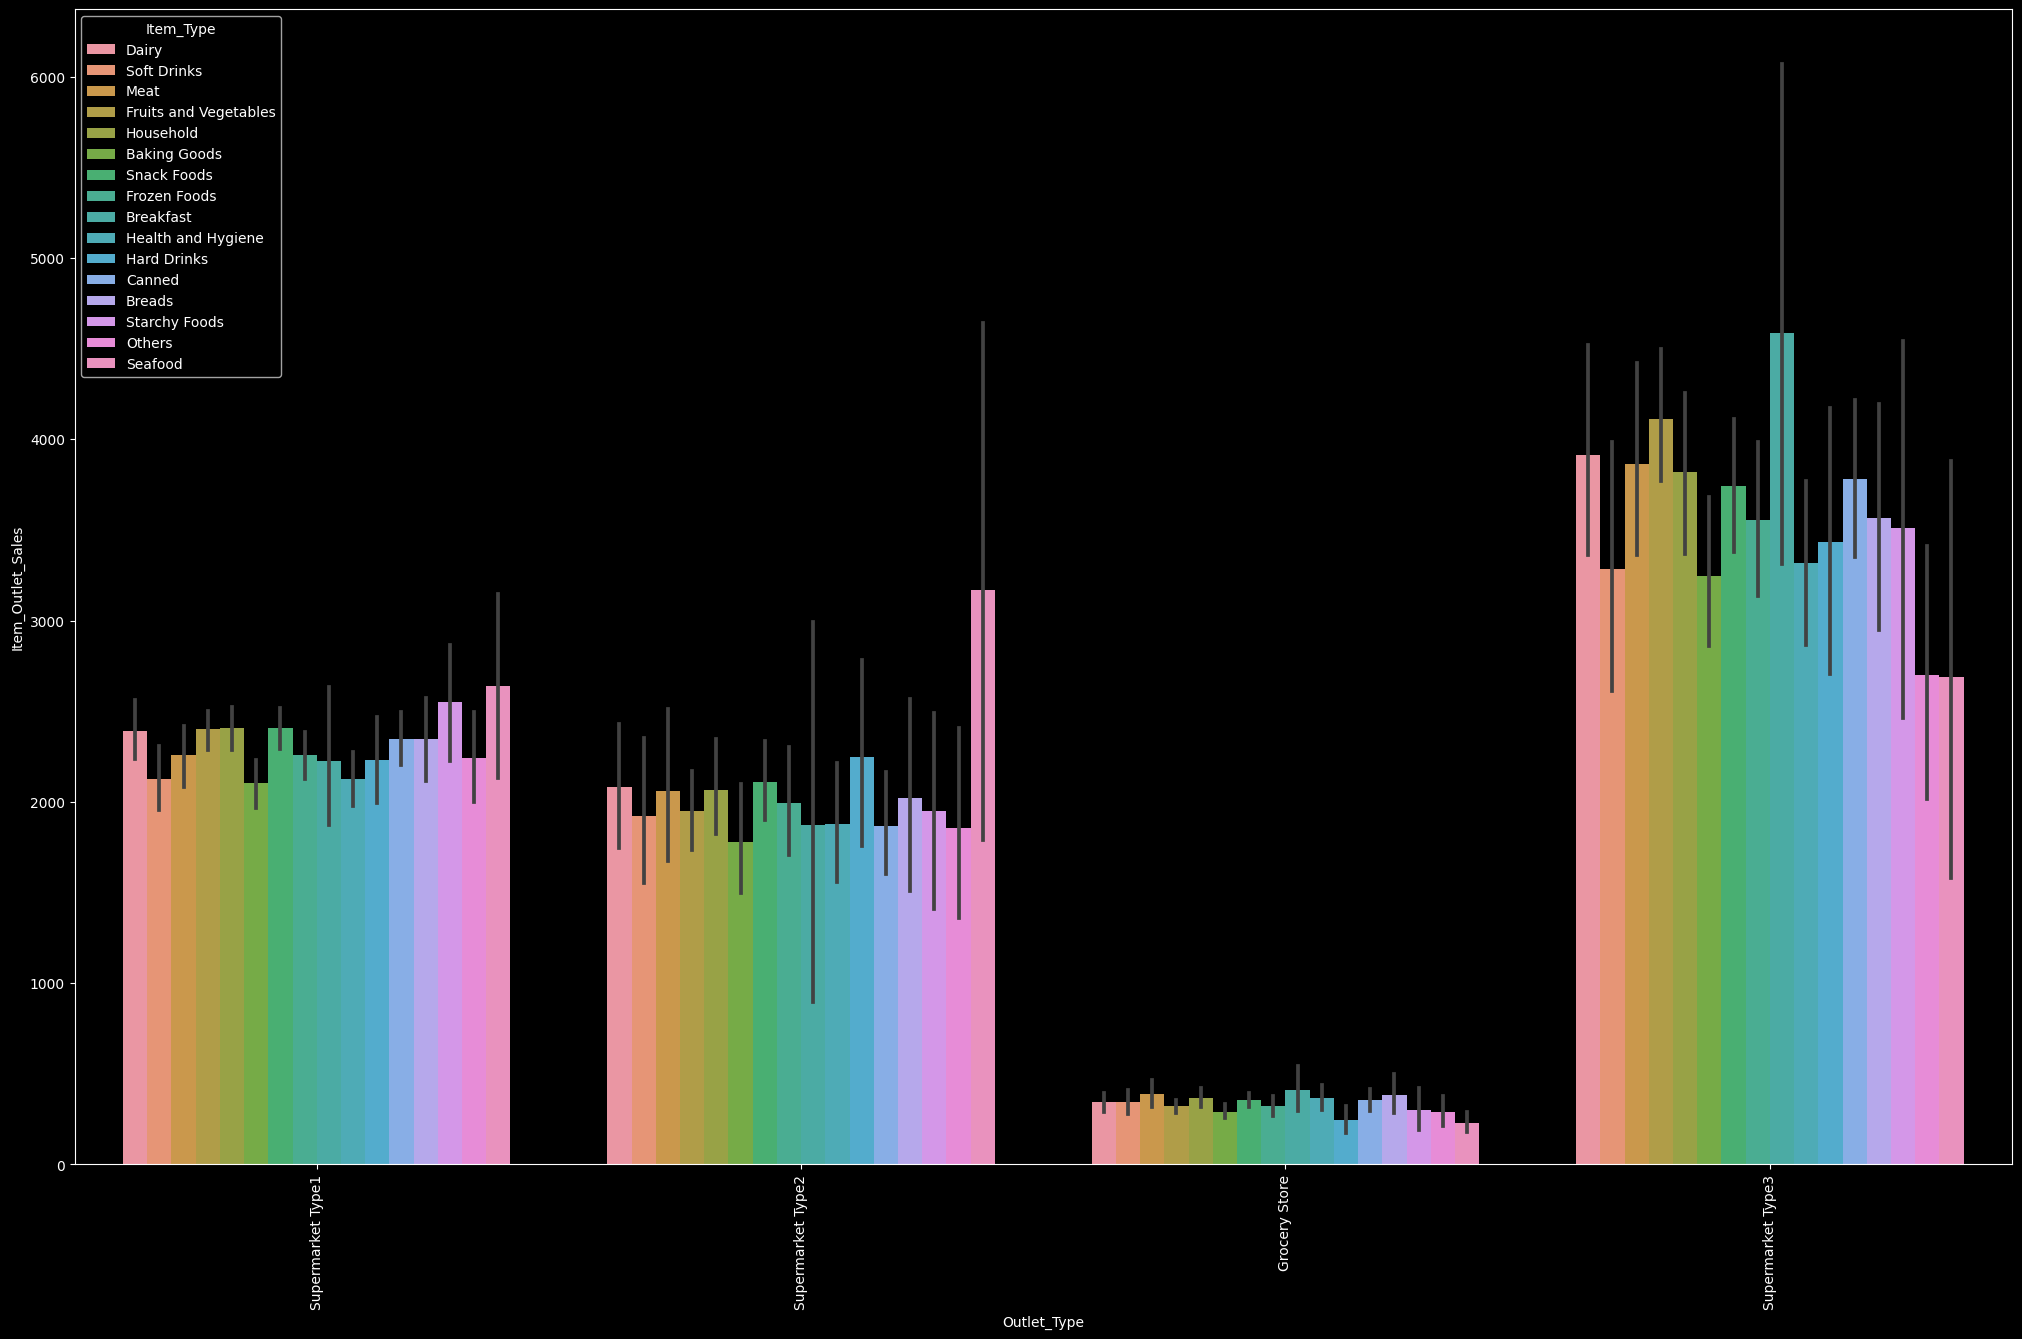

In [ ]:
fig,axes=plt.subplots(figsize=(25,15))

ax=sns.barplot(df_sales,x='Outlet_Type',y='Item_Outlet_Sales',hue="Item_Type")
ax.tick_params(axis='x',rotation=90)

#Heatmap to view the correlation between features.

In [ ]:
corr=df_sales.corr(numeric_only=True)
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


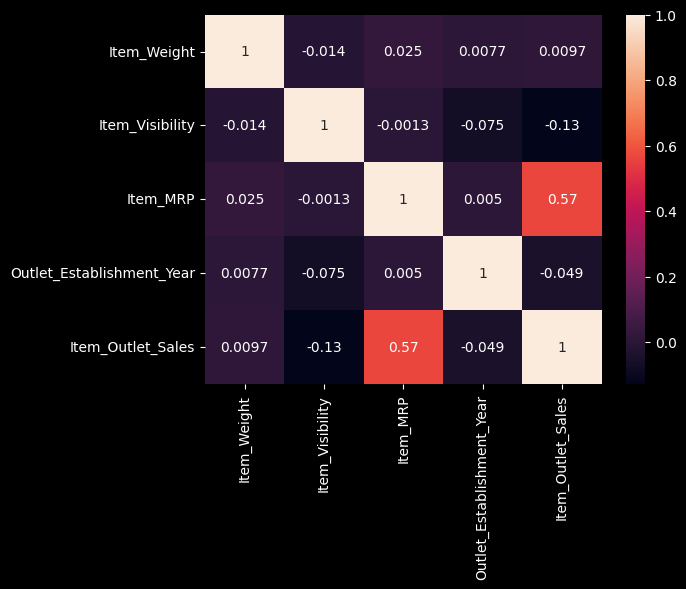

In [ ]:
ax=sns.heatmap(corr,annot=True)

## Feature Inspection

In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  plt.show()

  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  line_kws={'color':'red'}

  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws,line_kws=line_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax




       # run the appropriate explore function (based on feature's dtype)
       explore_numeric(df,feature);
       print('\n')

       # Run the appropriate feature vs. target function (based on dtype)
       plot_numeric_vs_target(df,feature, target_value);
       print('\n')
       print('\n')












In [ ]:

def Feature_Inspection_categorical(df,use_cols,target_value):
  for cols in use_cols:
    if (df[cols].dtypes=='O'):
    # Confirming the dtype to select correct EDA function
      feature = cols
      df[feature].dtype
      # run the appropriate explore function (based on feature's dtype)
      print('\n')
      explore_categorical(df,feature);
      # Run the appropriate feature vs. target function (based on dtype)
      print('\n')
      plot_categorical_vs_target(df, feature,target_value)
      print('\n')
      print('\n')


def Feature_Inspection_numric(df,use_cols,target_value):
  for cols in use_cols:
   if (cols!= target_value):
    if (df[cols].dtypes=='int' or df[cols].dtypes=='float'):

       # Confirming the dtype to select correct EDA function
       feature = cols
       df[feature].dtype
       print('\n')

In [ ]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
df_sales[cat_cols]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,MISSING,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,MISSING,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [ ]:
df2_sales[num_cols]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [ ]:
# Keep ony required columns
use_cols=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
df_sales=df_sales[use_cols]
df_sales

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,249.8092,1999,3735.1380,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,5.920,0.019278,48.2692,2009,443.4228,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,17.500,0.016760,141.6180,1999,2097.2700,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,19.200,0.000000,182.0950,1998,732.3800,Regular,Fruits and Vegetables,MISSING,Tier 3,Grocery Store
4,8.930,0.000000,53.8614,1987,994.7052,Low Fat,Household,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,8.380,0.046982,108.1570,2002,549.2850,Regular,Baking Goods,MISSING,Tier 2,Supermarket Type1
8520,10.600,0.035186,85.1224,2004,1193.1136,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,7.210,0.145221,103.1332,2009,1845.5976,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


- Defineing the  target column:
  - Item_Outlet_Sales

#Part One: nomnal columns

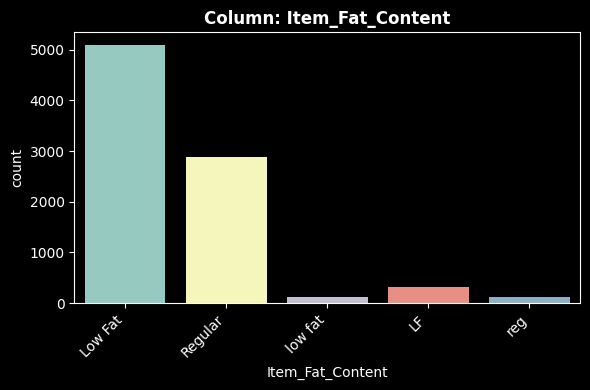

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Low Fat' occurs 5089 times (59.71%)
- Not constant or quasi-constant.




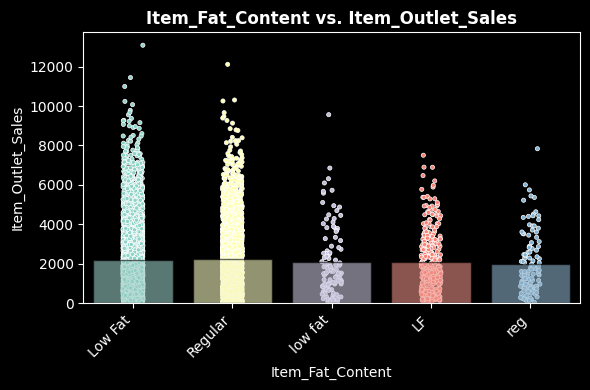

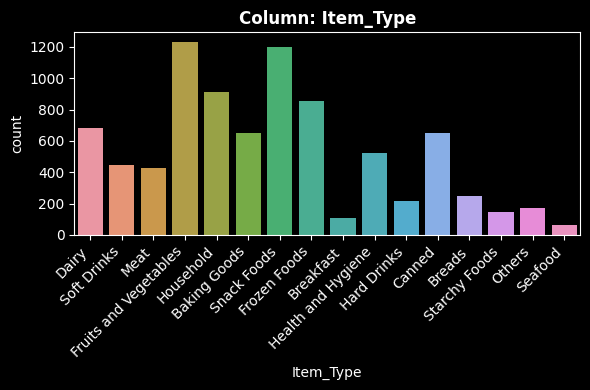

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.




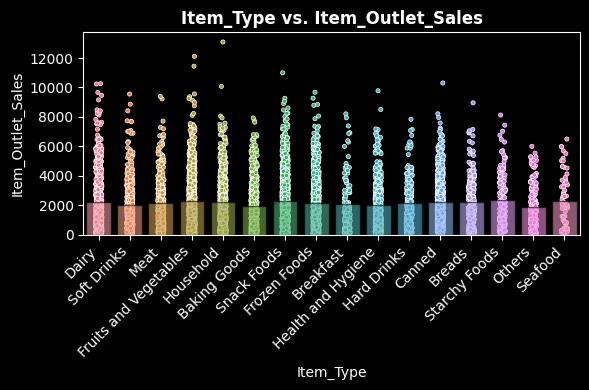

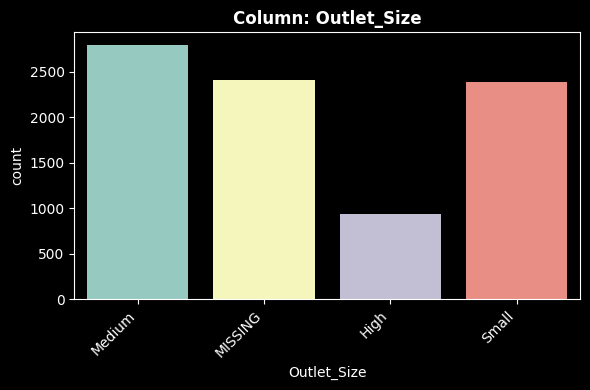

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.




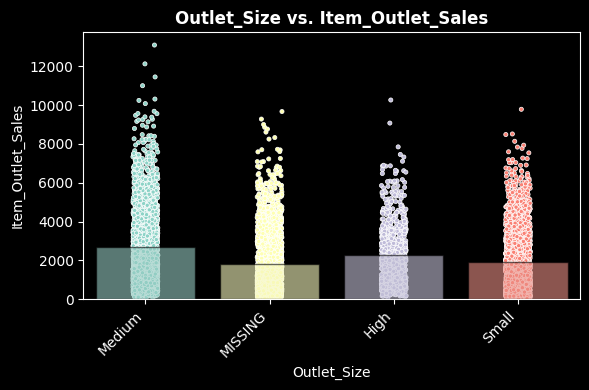

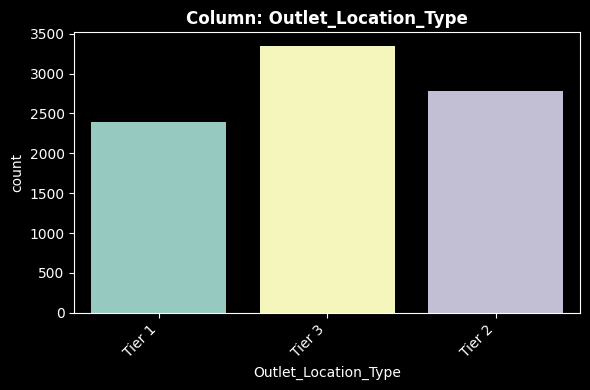

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.




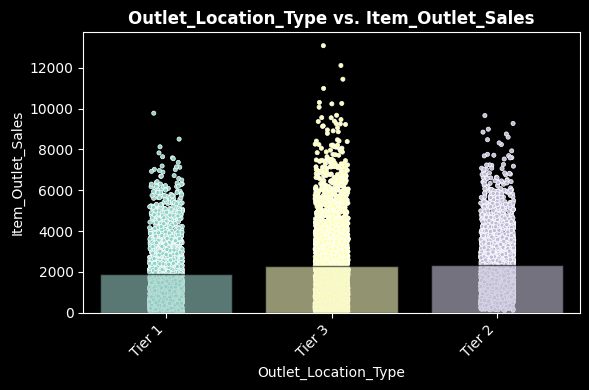

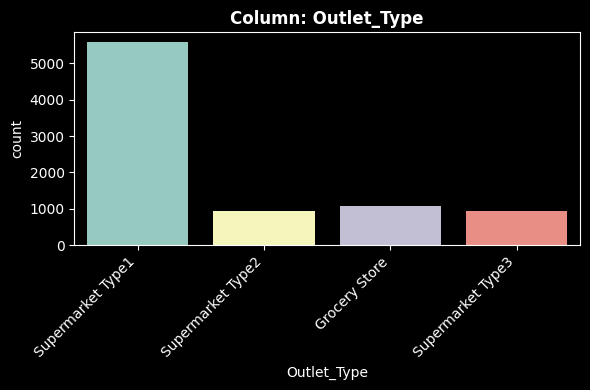

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.




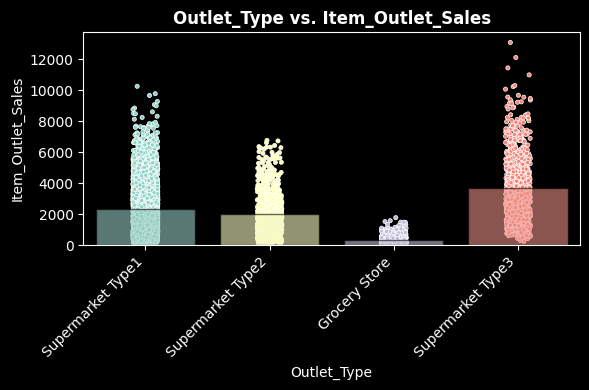

In [ ]:
Feature_Inspection_categorical(df2_sales,use_cols,'Item_Outlet_Sales')

##Item_Fat_Content
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.




**Feature vs. Target Observations:**


  - Based on your business understanding, would you expect this feature to be a predictor of the target?

      `Yes.`
  - Does this feature appear to be a predictor of the target?

     `Yes it does, there is variability between the groups, even though some have similar means.`

________________________________________________________________________________
##Item_Type


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 null values
  -  high cardinality ( < 10)

5. Would we know this BEFORE the target is determined?
  - NO.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.




**Feature vs. Target Observations:**



  - Based on your business understanding, would you expect this feature to be a predictor of the target?

      `Yes.`
  - Does this feature appear to be a predictor of the target?

     `No it doesn't, there is no variability between the groups, even though some have similar means but i think the effect of it is low .`

________________________________________________________________________________
##Outlet_Size
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values (28.28%)
  - Impute with "MISSING" placeholder.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 uniqe values
  -  high cardinality ( not > 10)

5. Would we know this BEFORE the target is determined?
  - NO.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



**Feature vs. Target Observations:**


  - Based on your business understanding, would you expect this feature to be a predictor of the target?

      `Yes.`
  - Does this feature appear to be a predictor of the target?

     `Yes it does, there is variability between the groups, even though some have similar means.`

________________________________________________________________________________
##Outlet_Location_Type
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



**Feature vs. Target Observations:**


  - Based on your business understanding, would you expect this feature to be a predictor of the target?

      `Yes.`
  - Does this feature appear to be a predictor of the target?

     `Yes it does, there is variability between the groups, even though some have similar means.`

________________________________________________________________________________
##Outlet_Type
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

**Feature vs. Target Observations:**


  - Based on your business understanding, would you expect this feature to be a predictor of the target?

      `Yes.`
  - Does this feature appear to be a predictor of the target?

     `Yes it does, there is variability between the groups, even though some have similar means.`

________________________________________________________________________________

#Part Two : numric columns

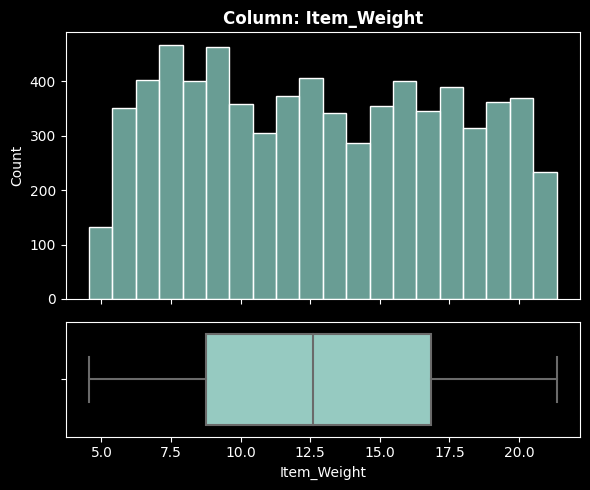

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.




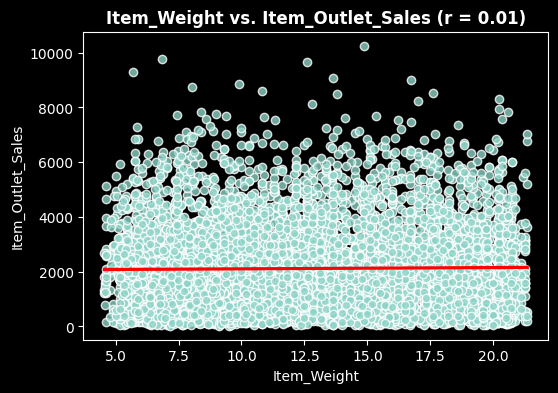

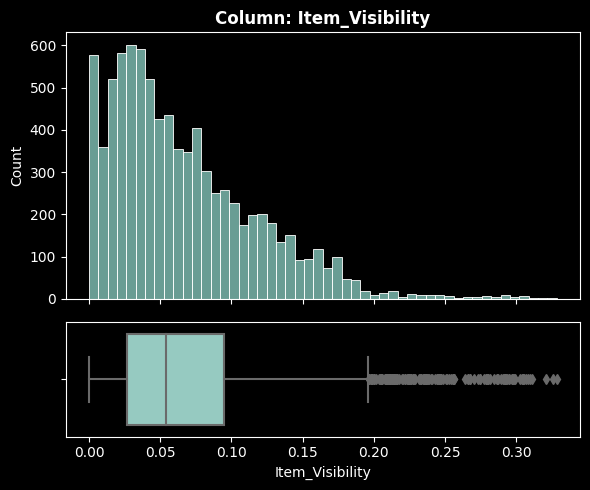

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.




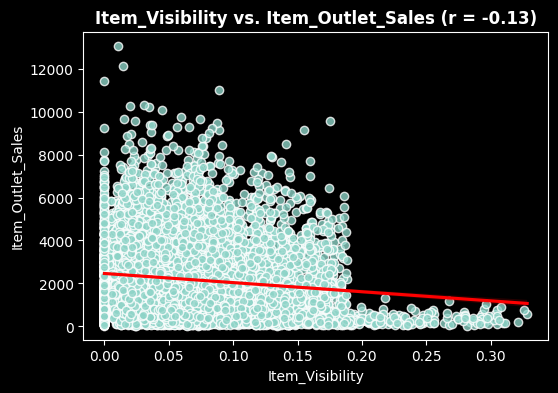

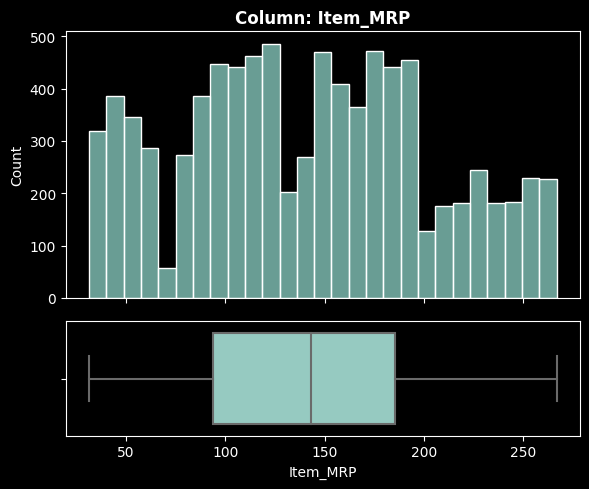

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.




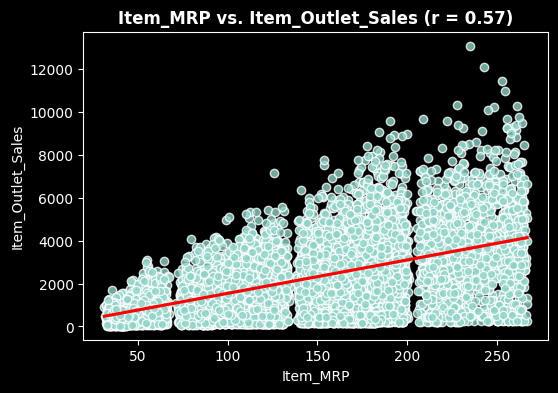

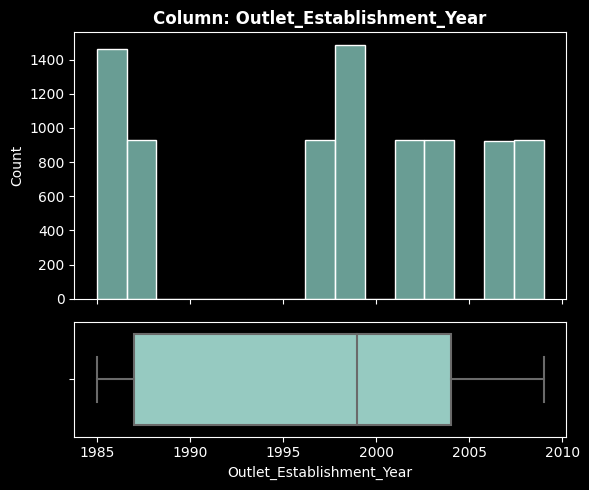

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.




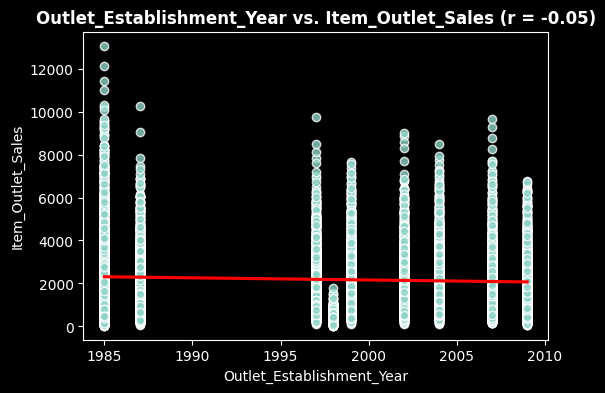

In [ ]:
Feature_Inspection_numric(df2_sales,use_cols,'Item_Outlet_Sales')

#Item_Weight
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 null values (17.17%).
  - imput it by medain value.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).


5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - NO
  - Does this feature appear to be a predictor of the target?
    - NO, trand line give us a constant value

___

________________________________________________________________________________
#Item_Visibility
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values .

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).


5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think people may prefer high calorie cereals.
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite direction than I expected!

___

#Item_MRP
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).


5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I would assume more protein would be better.
  - Does this feature appear to be a predictor of the target?
    - Yes!

___

#Outlet_Establishment_Year
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).


5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think people may prefer high calorie cereals.
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite direction than I expected!

___